# Bereinigung der Datensätze

## 1. Importieren der Pakete

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf 
import seaborn as sns


<class 'ModuleNotFoundError'>: No module named 'seaborn'

## 2. Kundendaten

### 2.1 Kundendatei einlesen

In [18]:
kunden = pd.read_csv("kunden.csv", decimal = '.', sep = ";")
kunden.head()

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1.0,43.0,K0310
1,54,77644.0,103145.70,1.0,40.0,K1042
2,55,44341.0,80565.16,0.0,37.0,K0382
3,49,67271.0,83949.89,0.0,42.0,K0498
4,46,49832.0,93781.58,0.0,41.0,K0552


### 2.2 Überblick über Datentypen

In [19]:
kunden.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

### 2.3. Bereinigung

### 2.3.1 Fehlende Datenpunkte ermitteln und ersetzen

In [20]:
kunden.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    5
Zeit          0
KundeNr       0
dtype: int64

In [21]:
# Finden des Modalwertes:

In [22]:
modalwert_kunden = kunden['Geschlecht'].mode()[0]

In [23]:
modalwert_kunden

1.0

In [24]:
# Ersetzen der 5 fehlenden Geschlechtseinträge mit dem Modalwert 1.0

In [25]:
kunden.fillna(value = modalwert_kunden, axis = 0, inplace = True)

In [26]:
# Überprüfung
kunden.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

### 2.3.2 Ausreißer ermitteln und entfernen

In [27]:
# Außreißer ermitteln
kunden.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,1104.0,50.481884,1.222506e+01,30.000000,40.0000,51.000,61.000,1.200000e+02
Einkommen,1104.0,964474.817596,3.009470e+07,-62840.374523,46638.5000,59013.000,70298.000,1.000000e+09
Preis,1104.0,88975.198714,2.446407e+04,21471.650000,70609.4225,88931.455,107093.375,1.654823e+05
Geschlecht,1104.0,0.639493,4.803653e-01,0.000000,0.0000,1.000,1.000,1.000000e+00
Zeit,1104.0,44.375906,1.084804e+01,12.000000,37.0000,44.000,52.000,8.000000e+01


### 2.3.2.1 Alter 

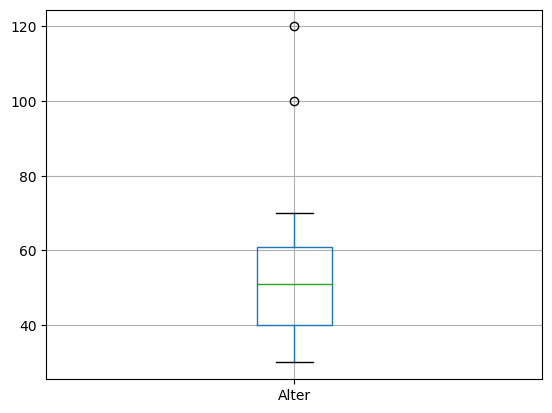

In [28]:
boxplot_alter = kunden.boxplot(column = 'Alter')
plt.show()

In [29]:
# zwei Ausreißer zu erkennen

In [30]:
# Berechnung von Q1, Q3 und IQR
Q1_Alter = kunden['Alter'].quantile(0.25)
Q3_Alter = kunden['Alter'].quantile(0.75)
IQR_Alter = Q3_Alter - Q1_Alter
# Berechnung der Ausreißer-Grenzen
untere_grenze_Alter = Q1_Alter - 1.5 * IQR_Alter
obere_grenze_Alter = Q3_Alter + 1.5 * IQR_Alter
kunden['Ausreißer'] = (kunden['Alter'] < untere_grenze_Alter) | (kunden['Alter'] > obere_grenze_Alter)
ausreißer_alter = kunden.Ausreißer.value_counts()
ausreißer_alter

False    1102
True        2
Name: Ausreißer, dtype: int64

In [31]:
# Ermitteln der genauen Werte der Ausreißer

In [32]:
kunden.loc[kunden['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
142,100,88749.0,119134.23,0.0,64.0,K0494,True
711,120,61857.0,104214.07,1.0,52.0,K0039,True


In [33]:
# Personen im Alter von 100 und 120 Jahren werden kein Auto mehr kaufen

In [34]:
# Ersetzen der Ausreißer in der Alters-Spalte durch Medianwert
alter_median = kunden['Alter'].median()
kunden.replace([120, 100], alter_median, inplace=True)

In [35]:
# Überprüfen ob noch Ausreißer vorhanden sind
kunden['Ausreißer'] = (kunden['Alter'] < untere_grenze_Alter) | (kunden['Alter'] > obere_grenze_Alter)
ausreißer_alter = kunden.Ausreißer.value_counts()
ausreißer_alter

False    1104
Name: Ausreißer, dtype: int64

In [36]:
# keine Ausreißer mehr vorhanden

## 2.3.2.2 Einkommen 

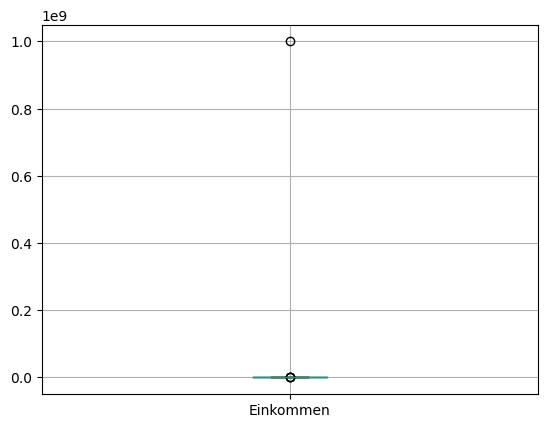

In [37]:
boxplot_einkommen = kunden.boxplot(column = 'Einkommen')
plt.show()

In [38]:
# 4 Ausreißer (aufgrund der Skalierung schwer zu erkennen)

In [39]:
# Berechnung von Q1, Q3 und IQR der Einkommens-Spalte
Q1_einkommen = kunden['Einkommen'].quantile(0.25)
Q3_einkommen = kunden['Einkommen'].quantile(0.75)
IQR_einkommen = Q3_einkommen - Q1_einkommen
IQR_einkommen
untere_grenze_einkommen = Q1_einkommen - 1.5 * IQR_einkommen
obere_grenze_einkommen = Q3_einkommen + 1.5 * IQR_einkommen
kunden['Ausreißer'] = (kunden['Einkommen'] < untere_grenze_einkommen) | (kunden['Einkommen'] > obere_grenze_einkommen)
ausreißer_einkommen = kunden.Ausreißer.value_counts()
ausreißer_einkommen

False    1100
True        4
Name: Ausreißer, dtype: int64

In [40]:
# Ermitteln der genauen Werte der 4 Ausreißer
kunden.loc[kunden['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
408,68,1.000000e+09,87209.72,0.0,52.0,K0701,True
834,68,1.076890e+05,165482.31,1.0,60.0,K0415,True
966,69,0.000000e+00,125140.05,1.0,65.0,K1021,True
1082,59,-6.284037e+04,92837.59,0.0,46.0,K1083,True


In [41]:
# Ersetzen der Ausreißer in der Einkommens-Spalte durch Medianwert
einkommen_median = kunden['Einkommen'].median()
kunden.replace({'Einkommen': [1.000000e+09, 1.076890e+05, 0.000000e+00, -62840.374523]}, einkommen_median, inplace=True)

In [42]:
# Überprüfen ob noch Ausreißer vorhanden sind
kunden['Ausreißer'] = (kunden['Einkommen'] < untere_grenze_einkommen) | (kunden['Einkommen'] > obere_grenze_einkommen)
ausreißer_einkommen = kunden.Ausreißer.value_counts()
ausreißer_einkommen

False    1104
Name: Ausreißer, dtype: int64

In [43]:
# keine Ausreißer mehr vorhanden

### 2.3.2.3 Preis

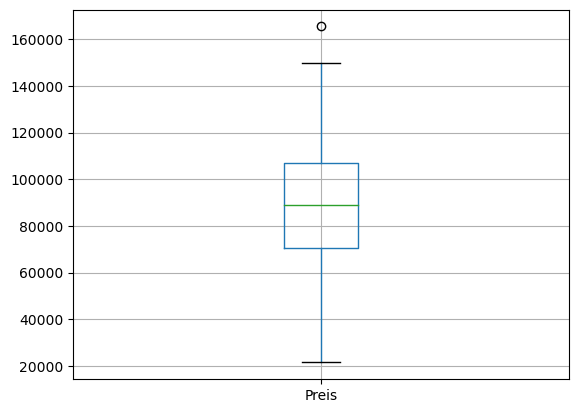

In [44]:
boxplot_preis = kunden.boxplot(column = 'Preis')
plt.show()

In [45]:
# ein Ausreißer zu erkennen

In [46]:
Q1_preis = kunden['Preis'].quantile(0.25)
Q3_preis = kunden['Preis'].quantile(0.75)
IQR_preis = Q3_preis - Q1_preis
IQR_preis
untere_grenze_preis = Q1_preis - 1.5 * IQR_preis
obere_grenze_preis = Q3_preis + 1.5 * IQR_preis
kunden['Ausreißer'] = (kunden['Preis'] < untere_grenze_preis) | (kunden['Preis'] > obere_grenze_preis)
ausreißer_preis = kunden.Ausreißer.value_counts()
ausreißer_preis

False    1103
True        1
Name: Ausreißer, dtype: int64

In [47]:
# Ermitteln der genauen Werte der Ausreißer
kunden.loc[kunden['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
834,68,59013.0,165482.31,1.0,60.0,K0415,True


In [48]:
# bei einem Einkommen von 59.013 ist es überraschend sich ein Auto im Preis von 165.482,31 zu kaufen, aber möglich, daher wird der Wert behalten


### 2.3.2.4 Zeit

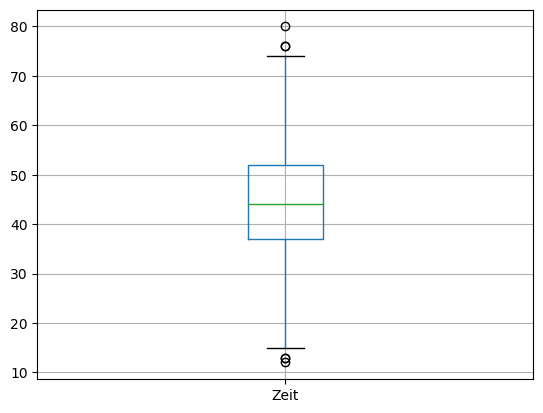

In [49]:
boxplot_preis = kunden.boxplot(column = 'Zeit')
plt.show()

In [50]:
# mehrere Ausreißer zu erkennen

In [51]:
# Berechnung von Q1, Q3 und IQR der Zeit-Spalte
Q1_zeit = kunden['Zeit'].quantile(0.25)
Q3_zeit = kunden['Zeit'].quantile(0.75)
IQR_zeit = Q3_zeit - Q1_zeit
IQR_zeit
untere_grenze_zeit = Q1_zeit - 1.5 * IQR_zeit
obere_grenze_zeit = Q3_zeit + 1.5 * IQR_zeit
kunden['Ausreißer'] = (kunden['Zeit'] < untere_grenze_zeit) | (kunden['Zeit'] > obere_grenze_zeit)
ausreißer_zeit = kunden.Ausreißer.value_counts()
ausreißer_zeit

False    1098
True        6
Name: Ausreißer, dtype: int64

In [52]:
# Ermittlung der genauen Werte der Ausreißer
kunden.loc[kunden['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
218,33,38675.0,56493.40,1.0,13.0,K0983,True
313,62,96569.0,140745.65,0.0,80.0,K0249,True
327,34,24811.0,57541.73,1.0,12.0,K0395,True
542,67,89170.0,123408.48,1.0,76.0,K1093,True
553,38,33666.0,50494.07,1.0,13.0,K0384,True
805,64,91409.0,140161.07,1.0,76.0,K0897,True


In [53]:
# Die Zeiten sind möglich, z.B. 12 Minuten weil keine Probefahrt gemacht wurde oder 80 Minuten weil eine lange gemacht wurde, Werte bleiben erhalten

In [54]:
kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
0,64,66894.0,88160.31,1.0,43.0,K0310,False
1,54,77644.0,103145.70,1.0,40.0,K1042,False
2,55,44341.0,80565.16,0.0,37.0,K0382,False
3,49,67271.0,83949.89,0.0,42.0,K0498,False
4,46,49832.0,93781.58,0.0,41.0,K0552,False
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,False
1100,38,48301.0,64230.98,1.0,33.0,K0122,False
1101,67,63547.0,103123.57,1.0,41.0,K1045,False
1102,37,32686.0,49215.87,1.0,36.0,K1096,False


In [55]:
# Boolean-Spalte wieder entfernen
kunden = kunden.drop(kunden.columns[-1], axis=1)
kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1.0,43.0,K0310
1,54,77644.0,103145.70,1.0,40.0,K1042
2,55,44341.0,80565.16,0.0,37.0,K0382
3,49,67271.0,83949.89,0.0,42.0,K0498
4,46,49832.0,93781.58,0.0,41.0,K0552
...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467
1100,38,48301.0,64230.98,1.0,33.0,K0122
1101,67,63547.0,103123.57,1.0,41.0,K1045
1102,37,32686.0,49215.87,1.0,36.0,K1096


## 3. Besucherdaten

### 3.1 Besucherdatei einlesen

In [56]:
besucher = pd.read_csv("besucher.csv", decimal = '.', sep = ";")
besucher.head()

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,"39919,0953348874",0,"29,0",K1814
1,41,"53430,67308587748",0,"27,0",K1544
2,64,"73163,2169267002",0,"32,0",K1945
3,41,"36761,482581315344",0,"44,0",K1825
4,35,"42684,33163178136",1,"33,0",K1144


### 3.2 Überblick über Datentypen

In [57]:
besucher.dtypes

Alter          int64
Einkommen     object
Geschlecht     int64
Zeit          object
KundeNr       object
dtype: object

In [58]:
# zum Vergleich: Kunden
kunden.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

In [59]:
# Alter = int, Einkommen = float (ändern bei besucher), Preis = float, Geschlecht = int (ändern bei kunden), Zeit = float (ändern bei besucher), KundeNr = object

### 3.3. Bereinigung

In [60]:
# vermutlich ist die Kommaschreibweise aus dem deutschen, während wir die Werte in der englischen Schreibweise mit einem Punkt, statt Komma benötigen

### 3.3.1 Bereinigung der Nachkommastellen und Umwandlung der dtypes

### 3.3.1.1 Einkommen

In [61]:
besucher["Einkommen"] = besucher["Einkommen"].str.replace(",",".")
besucher["Einkommen"] = pd.to_numeric(besucher["Einkommen"]) 
besucher["Einkommen"] = besucher["Einkommen"].round(0).astype("float64")
besucher

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,39919.0,0,"29,0",K1814
1,41,53431.0,0,"27,0",K1544
2,64,73163.0,0,"32,0",K1945
3,41,36761.0,0,"44,0",K1825
4,35,42684.0,1,"33,0",K1144
...,...,...,...,...,...
886,32,34392.0,1,"48,0",K1211
887,41,68516.0,0,"34,0",K1375
888,65,89685.0,0,"23,0",K1965
889,68,95714.0,0,"32,0",K1540


### 3.3.1.2 Zeit

In [62]:
besucher["Zeit"] = besucher["Zeit"].str.replace(",",".")
besucher["Zeit"] = pd.to_numeric(besucher["Zeit"])
besucher["Zeit"] = besucher["Zeit"].round(0).astype("float64")
besucher

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,39919.0,0,29.0,K1814
1,41,53431.0,0,27.0,K1544
2,64,73163.0,0,32.0,K1945
3,41,36761.0,0,44.0,K1825
4,35,42684.0,1,33.0,K1144
...,...,...,...,...,...
886,32,34392.0,1,48.0,K1211
887,41,68516.0,0,34.0,K1375
888,65,89685.0,0,23.0,K1965
889,68,95714.0,0,32.0,K1540


### 3.3.1.3 Umwandlung von Geschlecht von float in integer


In [63]:
kunden["Geschlecht"] = kunden["Geschlecht"].astype("int64")
kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1,43.0,K0310
1,54,77644.0,103145.70,1,40.0,K1042
2,55,44341.0,80565.16,0,37.0,K0382
3,49,67271.0,83949.89,0,42.0,K0498
4,46,49832.0,93781.58,0,41.0,K0552
...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1,51.0,K0467
1100,38,48301.0,64230.98,1,33.0,K0122
1101,67,63547.0,103123.57,1,41.0,K1045
1102,37,32686.0,49215.87,1,36.0,K1096


In [64]:
# Überprüfen der dtypes
besucher.dtypes, kunden.dtypes

(Alter           int64
 Einkommen     float64
 Geschlecht      int64
 Zeit          float64
 KundeNr        object
 dtype: object,
 Alter           int64
 Einkommen     float64
 Preis         float64
 Geschlecht      int64
 Zeit          float64
 KundeNr        object
 dtype: object)

### 3.3.2 Fehlende Datenpunkte ermitteln und ersetzen

In [65]:
besucher.isnull().sum()

Alter         0
Einkommen     0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

In [66]:
# keine fehlenden Datenpunkte im Datensatz

### 3.3.3 Ausreißer ermitteln und entfernen

In [67]:
# Außreißer ermitteln
kunden.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,1104.0,50.375000,11.951426,30.00,40.0000,51.000,61.000,70.00
Einkommen,1104.0,58850.907609,16443.509924,14547.00,46697.0000,59013.000,70270.250,100769.00
Preis,1104.0,88975.198714,24464.067781,21471.65,70609.4225,88931.455,107093.375,165482.31
Geschlecht,1104.0,0.639493,0.480365,0.00,0.0000,1.000,1.000,1.00
Zeit,1104.0,44.375906,10.848040,12.00,37.0000,44.000,52.000,80.00


### 3.3.3.1 Alter

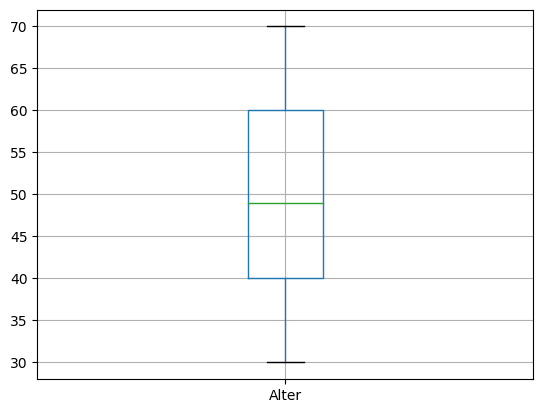

In [68]:
boxplot_besucher_alter = besucher.boxplot(column = 'Alter')
plt.show()

In [69]:
# sowohl bei describe-Tabelle als auch beim boxplot keine Ausreißer zu erkennen

### 3.3.3.2 Einkommen

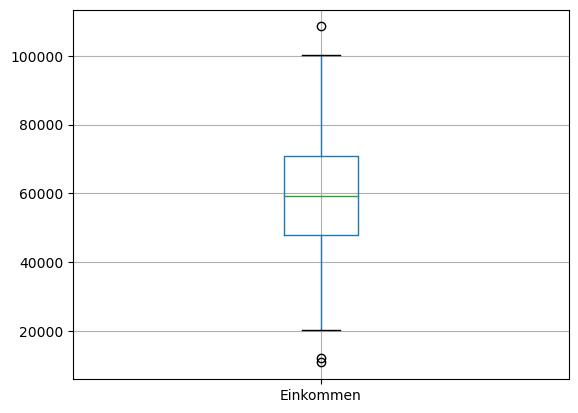

In [70]:
boxplot_besucher_einkommen = besucher.boxplot(column = 'Einkommen')
plt.show()

In [71]:
# mehrere Ausreißer zu erkennen

In [72]:
# Berechnung von Q1, Q3 und IQR der Zeit-Spalte
Q1_einkommen_besucher = besucher['Einkommen'].quantile(0.25)
Q3_einkommen_besucher = besucher['Einkommen'].quantile(0.75)
IQR_einkommen_besucher = Q3_einkommen_besucher - Q1_einkommen_besucher
untere_grenze_einkommen_besucher = Q1_einkommen_besucher - 1.5 * IQR_einkommen_besucher
obere_grenze_einkommen_besucher = Q3_einkommen_besucher + 1.5 * IQR_einkommen_besucher
besucher['Ausreißer'] = (besucher['Einkommen'] < untere_grenze_einkommen_besucher) | (besucher['Einkommen'] > obere_grenze_einkommen_besucher)
ausreißer_einkommen_besucher = besucher.Ausreißer.value_counts()
ausreißer_einkommen_besucher

False    888
True       3
Name: Ausreißer, dtype: int64

In [73]:
# Ermitteln der genauen Werte der Ausreißer
besucher.loc[besucher['Ausreißer'] == True]

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Ausreißer
44,69,108569.0,1,47.0,K1467,True
132,31,12032.0,1,32.0,K1586,True
265,31,10802.0,1,25.0,K1561,True


In [74]:
# so niedriges und so hohes Einkommen ist möglich, daher bleiben Werte erhalten

### 3.3.3.3 Zeit

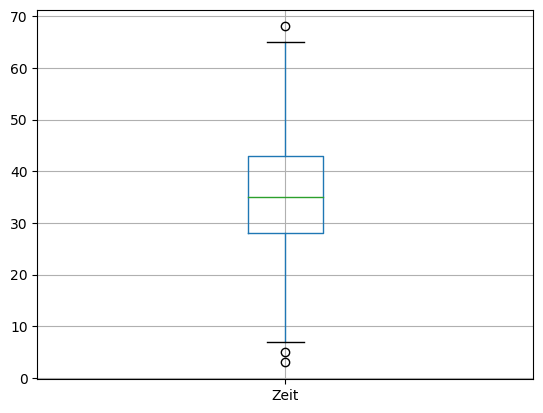

In [75]:
boxplot_besucher_zeit = besucher.boxplot(column = 'Zeit')
plt.show()

In [76]:
# mehrere Ausreißer zu erkennen

In [77]:
# Berechnung von Q1, Q3 und IQR der Zeit-Spalte
Q1_zeit_besucher = besucher['Zeit'].quantile(0.25)
Q3_zeit_besucher = besucher['Zeit'].quantile(0.75)
IQR_zeit_besucher = Q3_zeit_besucher - Q1_zeit_besucher
untere_grenze_zeit_besucher = Q1_zeit_besucher - 1.5 * IQR_zeit_besucher
obere_grenze_zeit_besucher = Q3_zeit_besucher + 1.5 * IQR_zeit_besucher
besucher['Ausreißer'] = (besucher['Zeit'] < untere_grenze_zeit_besucher) | (besucher['Zeit'] > obere_grenze_zeit_besucher)
ausreißer_zeit_besucher = besucher.Ausreißer.value_counts()
ausreißer_zeit_besucher

False    888
True       3
Name: Ausreißer, dtype: int64

In [78]:
# Ermittlung der genauen Werte der Ausreißer
besucher.loc[besucher['Ausreißer'] == True]

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Ausreißer
105,40,39581.0,1,5.0,K1547,True
158,31,38299.0,1,3.0,K1623,True
603,62,84205.0,1,68.0,K1526,True


In [79]:
# so kurze und lange Zeiten sind möglich, daher bleiben Werte erhalten

In [80]:
besucher

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Ausreißer
0,30,39919.0,0,29.0,K1814,False
1,41,53431.0,0,27.0,K1544,False
2,64,73163.0,0,32.0,K1945,False
3,41,36761.0,0,44.0,K1825,False
4,35,42684.0,1,33.0,K1144,False
...,...,...,...,...,...,...
886,32,34392.0,1,48.0,K1211,False
887,41,68516.0,0,34.0,K1375,False
888,65,89685.0,0,23.0,K1965,False
889,68,95714.0,0,32.0,K1540,False


In [81]:
# Boolean-Spalte wieder entfernen

In [82]:
besucher = besucher.drop(besucher.columns[-1], axis=1)
besucher

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,39919.0,0,29.0,K1814
1,41,53431.0,0,27.0,K1544
2,64,73163.0,0,32.0,K1945
3,41,36761.0,0,44.0,K1825
4,35,42684.0,1,33.0,K1144
...,...,...,...,...,...
886,32,34392.0,1,48.0,K1211
887,41,68516.0,0,34.0,K1375
888,65,89685.0,0,23.0,K1965
889,68,95714.0,0,32.0,K1540


# 4. Geo-Daten

### 4.1. Geodatei einlesen

In [83]:
geo = pd.read_csv("geo.txt", sep = "\t")
geo.head()

,KundeNr,Niederlassung
0,K0001,Sachsen
1,K0002,NRW
2,K0003,Hessen
3,K0004,Bayern
4,K0005,Bayern


## 4.2 Überblick über Datentypen

In [84]:
geo.dtypes

KundeNr          object
Niederlassung    object
dtype: object

In [85]:
# bei kunden und besucher ist der dypte der KundeNr auch object, daher keine Änderung benötigt

### 4.3 Bereinigung

### 4.3.1 Fehlende Datenpunkte ermitteln und ersetzen

In [86]:
geo.isnull().sum()

KundeNr          0
Niederlassung    0
dtype: int64

### 4.3.2 Ausreißer ermitteln und entfernen/ersetzen

In [87]:
# Übersicht aller Niederlassungen
geo_niederlassung_uniques = geo["Niederlassung"].unique()
print(geo_niederlassung_uniques)

['Sachsen' 'NRW' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Nordrhein-Westfalen' 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen'
 'Hamburg' 'Düsseldorf' 'Berlin-Charlottenburg' 'Berlin-Mitte' 'BERLIN']


In [88]:
# Bereinigung der Datenpunkte (NRW, Düsseldorf zu Nordrhein-Westfalen), (Berlin-Charlottenburg, Berlin-Mitte, BERLIN zu Berlin)
geo_cleaning = {
    "NRW" : "Nordrhein-Westfalen" , 
    "Berlin-Charlottenburg" : "Berlin" ,
    "Berlin-Mitte" : "Berlin" ,
    "BERLIN" : "Berlin",
    "Düsseldorf" : "Nordrhein-Westfalen"}

geo["Niederlassung"] = geo["Niederlassung"].replace(geo_cleaning, regex = True)

In [89]:
# Überprüfung
geo_niederlassung_uniques2 = geo["Niederlassung"].unique()
print(geo_niederlassung_uniques2)

['Sachsen' 'Nordrhein-Westfalen' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen' 'Hamburg']


## 5. Zusammenführung der Listen

### 5.1 Kunden und Besucher mit Geo

### 5.1.1 Kunden mit Geo 

In [90]:
kunden_geo = pd.merge(kunden,geo, on = "KundeNr")
kunden_geo

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1,43.0,K0310,Bayern
1,54,77644.0,103145.70,1,40.0,K1042,Berlin
2,55,44341.0,80565.16,0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1,36.0,K1096,Baden-Württemberg


### 5.1.2 Besucher mit Geo

In [91]:
besucher_geo = pd.merge(besucher, geo, on = "KundeNr")
besucher_geo

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Niederlassung
0,30,39919.0,0,29.0,K1814,Bayern
1,41,53431.0,0,27.0,K1544,Baden-Württemberg
2,64,73163.0,0,32.0,K1945,Baden-Württemberg
3,41,36761.0,0,44.0,K1825,Baden-Württemberg
4,35,42684.0,1,33.0,K1144,Nordrhein-Westfalen
...,...,...,...,...,...,...
886,32,34392.0,1,48.0,K1211,Hessen
887,41,68516.0,0,34.0,K1375,Sachsen
888,65,89685.0,0,23.0,K1965,Bayern
889,68,95714.0,0,32.0,K1540,Bayern


### 5.2 kunden_geo und besucher_geo zu df_final

In [92]:
df_final = pd.concat([kunden_geo, besucher_geo], axis = 0, ignore_index = True)
df_final

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1,43.0,K0310,Bayern
1,54,77644.0,103145.70,1,40.0,K1042,Berlin
2,55,44341.0,80565.16,0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1990,32,34392.0,NaN,1,48.0,K1211,Hessen
1991,41,68516.0,NaN,0,34.0,K1375,Sachsen
1992,65,89685.0,NaN,0,23.0,K1965,Bayern
1993,68,95714.0,NaN,0,32.0,K1540,Bayern


### 5.3 CSV Datei df_final

In [93]:
df_final.to_csv('df_final.csv', index=False)

In [94]:
<html>
<body>
</body>
</html>

<class 'SyntaxError'>: invalid syntax (<ipython-input-94-1a5546d10e5d>, line 1)

<html>
<body>
<font size = "8">Elektrauto AG</font><br>
<i>HWR Berlin, Sommersemester 2024 </i><br>
<i> Maximilian Czapons, Monika Nekipelova, Nicola Reitz</i><br>
<i> 27. Juni 2024 </i>
</body>
</html>

<font size = "8">CEO Präsentation: Performance Analyse</font>

<html>
<body>
<font size = "8">Gliederung</font><br>
    <ol>
        <li> Verkaufszahlen </li>
        <li> Umsatzzahlen </li>
        <li> Regionale Verteilung </li>
        <li> Kundenanalyse </li>
        <li> Einfluss der sozioökonomischen Faktoren </li>
    </ol>
</body>
</html>

# Verkaufszahlen

<html>
<body>
<font size = "6"> F1: Wie viele Autos wurden verkauft</font>
    <h3>Trotz wenigen Monaten im Markt starke Zahlen:</h3>
        <ul> 
            <li> 1104 verkaufte Autos </li>
            <li> Eintritt gelungen</li>
        </ul>
</body>
</html>

<html>
<body>
<font size = "6">F2: Was ist der Höchst-, Mindest- und Durchschnittspreis?</font>
    <br><br><br>
<table border="1" class="dataframe" style="float: left;">
  <thead>
    <tr style="text-align: left;">
      <th></th>
      <th>Maximaler Verkaufspreis</th>
      <th>Minimaler Verkaufspreis</th>
      <th>Durchschnittspreis</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th></th>
      <td>165.482,31 Euro</td>
      <td>21.471,65 Euro</td>
      <td>88.975,20 Euro</td>
    </tr>
  </tbody>
</table>
</body>
</html>

<html>
<body>
    <h3> Große Spanne </h3>
        <ul> 
            <li> Diversifizierte Produktlinie </li>
            <li> Diverse Zusatzoptionen mit Aufpreisen </li>
        </ul>

</body>
</html>

<html>
<body>
    <h3> Nutzen der Spanne </h3>
        <ul> Verschiedene Kostenoptionen (mit je Zusatzoptionen)
            <li> günstig </li>
            <li> mittel</li>
            <li> teuer</li>
        </ul>
        <ul> Verschiedene Modelle (mit je Zusatzoptionen)
            <li> Kleinwagen </li>
            <li> SUV</li>
            <li> Sportwagen </li>
        </ul>
</body>
</html>

# Umsatzzahlen


<html>
<body>
<font size = "6">F3: Wie hoch war der Gesamtumsatz?</font>
    <h3> In den wenigen Monaten im Markt beeindruckenden Umsatz erzielt</h3>
    <ul> 
        <li> Gesamtumsatz: 92.228.619,38 Euro</li>
        <li> Eintritt gelungen </li>
    </ul>
</body>
</html>

# Regionale Aufteilung

<html>    
<body>
    <font size="6">F4: Wie viele Autos wurden pro Bundesland verkauft?</font>
</body>
</html>

In [95]:
autos_pro_bundesland = kunden_geo["Niederlassung"].value_counts()
autos_pro_bundesland


Baden-Württemberg      205
Bayern                 188
Nordrhein-Westfalen    175
Berlin                 126
Hessen                  96
Niedersachsen           96
Sachsen                 89
Thüringen               49
Hamburg                 43
Brandenburg             37
Name: Niederlassung, dtype: int64

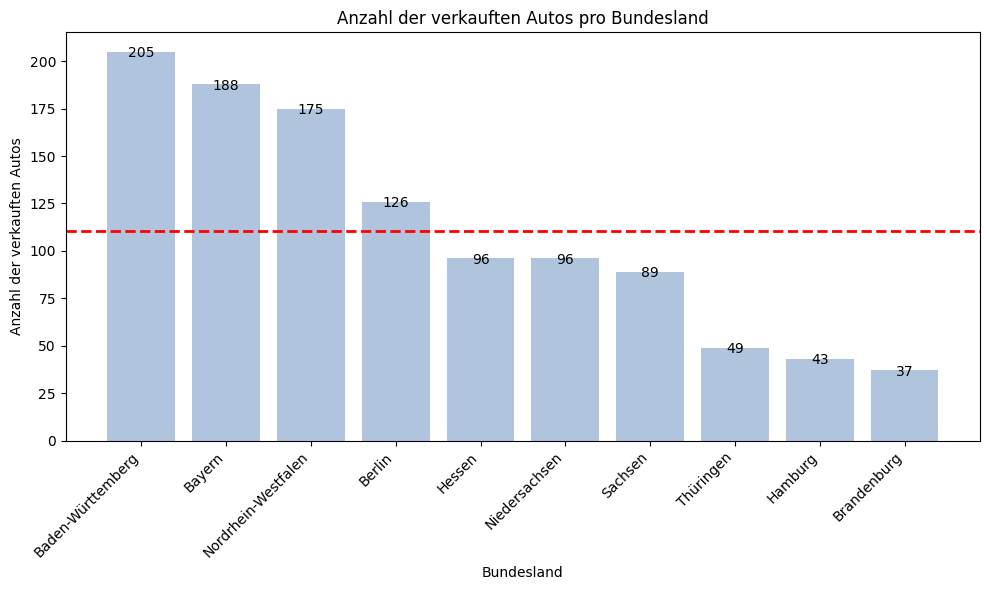

In [96]:
# Erstellen eines Diagramms zur Darstellung
# Dataframe
daten = {"Bundesland" : ["Baden-Württemberg" , "Bayern" , "Nordrhein-Westfalen" , "Berlin" , "Hessen" , "Niedersachsen",
                        "Sachsen" , "Thüringen" , "Hamburg" , "Brandenburg"] , 
        "Verkäufe" : [205 , 188 , 175 , 126 , 96 , 96 , 89 , 49 , 43 , 37]}

df_autos_pro_bundesland = pd.DataFrame(daten)

verkäufe_durchschnitt = df_autos_pro_bundesland["Verkäufe"].mean()

# Diagramm
plt.figure(figsize=(10, 6))
diagramm = plt.bar(df_autos_pro_bundesland["Bundesland"],df_autos_pro_bundesland["Verkäufe"], color="lightsteelblue")
plt.axhline(y=verkäufe_durchschnitt, color='red', linestyle='--', linewidth=2)

for bar in diagramm:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", ha = "center", va = "center_baseline", fontsize=10)
    
plt.title("Anzahl der verkauften Autos pro Bundesland")
plt.xlabel("Bundesland")
plt.ylabel("Anzahl der verkauften Autos")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

<body>
<html>
<font size = "6">F5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?</font>
</body>
</html>

In [97]:
umsatz_pro_bundesland = kunden_geo.groupby("Niederlassung")["Preis"].agg("mean")
umsatz_pro_bundesland = umsatz_pro_bundesland.round(2)
umsatz_pro_bundesland

Niederlassung
Baden-Württemberg      90969.56
Bayern                 89344.31
Berlin                 89584.98
Brandenburg            86673.64
Hamburg                85549.50
Hessen                 85864.93
Niedersachsen          87963.31
Nordrhein-Westfalen    88633.27
Sachsen                89455.08
Thüringen              90816.99
Name: Preis, dtype: float64

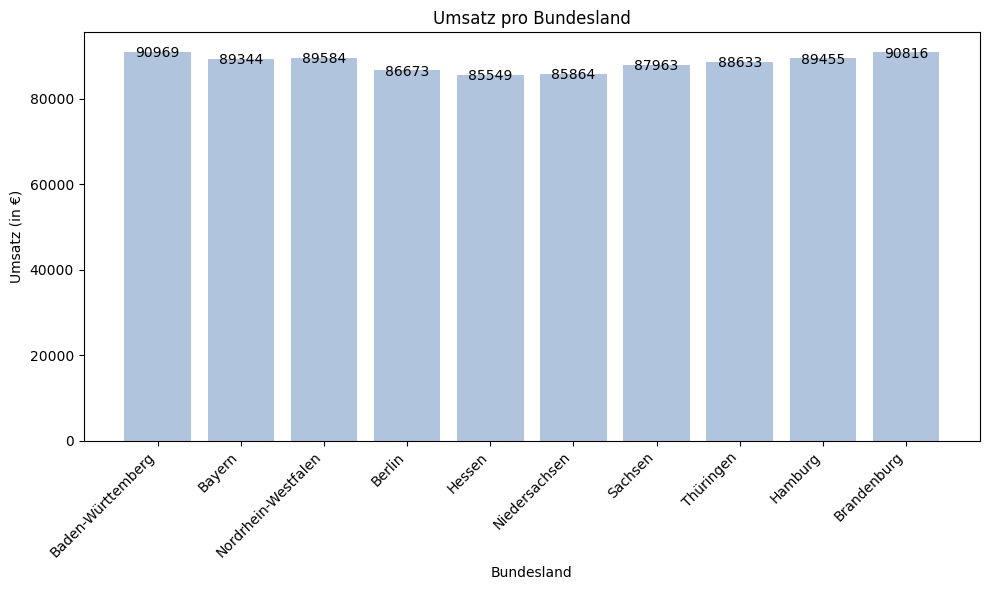

In [98]:
# Erstellen eines Diagramms zur Darstellung
# Dataframe
daten2 = {"Bundesland" : ["Baden-Württemberg" , "Bayern" , "Nordrhein-Westfalen" , "Berlin" , "Hessen" , "Niedersachsen",
                        "Sachsen" , "Thüringen" , "Hamburg" , "Brandenburg"] , 
        "Umsatz" : [90969.56 , 89344.31 , 89584.98 , 86673.64 , 85549.50 , 85864.93 , 87963.31 , 88633.27 , 89455.08 , 90816.99]}

df_umsatz_pro_bundesland = pd.DataFrame(daten2)

# Diagramm
plt.figure(figsize=(10, 6))
diagramm2 = plt.bar(df_umsatz_pro_bundesland["Bundesland"],df_umsatz_pro_bundesland["Umsatz"], color="lightsteelblue")

for bar in diagramm2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", ha = "center", va = "center_baseline", fontsize=10)

plt.title("Umsatz pro Bundesland")
plt.xlabel("Bundesland")
plt.ylabel("Umsatz (in €)")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


<html>
<body>
<font size = "6"> F6: In welchem Bundesland wurde das teuerste Auto verkauft?</font>
    <h3>Bundesland und Preis:</h3>
        <ul> 
            <li> teuerstes Auto: In Niedersachsen für 165.482,31 Euro  </li>
            <li> günstigstes Auto: In Sachsen für 21.471,65 Euro </li>
        </ul>
</body>
</html>

# Kundenanalyse

<html>
<body>
<font size = "6">F7: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?</font>
</body>
</html>

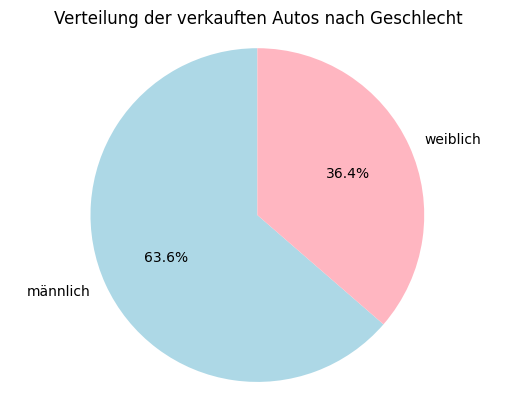

In [110]:
geschlecht_vergleich = kunden_geo["Geschlecht"].value_counts()

labels = ["männlich", "weiblich"]
sizes = [700,400]
colors = ["lightblue","lightpink"]
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 90)
plt.axis("equal")
plt.title("Verteilung der verkauften Autos nach Geschlecht")
plt.show()


<html>
<body> 
<font size = "6">F8: Wie hoch ist das Durchschnittsalter unserer Kunden und unserer Besucher?</font>
        <h3>Durchschnittsalter der Kunden und Besucher</h3>
        <table border="1" class="dataframe" style="float: left;">
            <tr>
                <th>Kategorie</th>
                <th>Durchschnittsalter</th>
            </tr>
            <tr>
                <td>Kunden</td>
                <td>50,38 Jahre</td>
            </tr>
            <tr>
                <td>Besucher</td>
                <td>49,88 Jahre</td>
            </tr>
        </table>
</body>
</html>

<html>
<body>
<font size = "6">F9: Wie hoch ist das Durchschnittseinkommen unserer Kunden und unserer Besucher</font>
    <h3>Durchschnittseinkommen der Kunden und Besucher</h3>
        <table border="1" class="dataframe" style="float: left;">
            <tr>
                <th>Kategorie</th>
                <th>Durchschnittseinkommen</th>
            </tr>
            <tr>
                <td>Kunden</td>
                <td>58.850,91 Euro</td>
            </tr>
            <tr>
                <td>Besucher</td>
                <td>59.367,93 Euro</td>
            </tr>
        </table>
</body>
</html>

<html>
<body>
<font size = "6">13. Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen?</font>
    <h3> Mögliches Risiko:</h3>
        <ul> 
            <li> 5 Kunden haben keinen Kredit aufgenommen  </li>
            <li> 99,55% unserer Kunden finanzieren sich ihr Auto mit einem Kredit</li>
        </ul>
</body>
</html>

# Einfluss der sozioökonomischen Faktoren

<html>
<body>
<font size = "6">F14: Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? </font><br>
    <table border="1" class="dataframe" style="float: left;">
        <tr>
                <th>Faktor</th>
                <th>Preiserhöhung pro 1 Einheit des Faktors</th>
            </tr>
            <tr>
                <td>Alter</td>
                <td>499,50 Euro</td>
            </tr>
            <tr>
                <td>Einkommen</td>
                <td>1,05 Euro</td>
            </tr>
            <tr>
                <td>Geschlecht (wenn männlich)</td>
                <td>2214,94 Euro</td>
            </tr>
    </table>
</body>
</html>

<html>
<body>
<font size = "8"> Ende der CEO Präsentation</font>
</body>
</html>

<html>
<body>
<font size = "8"> Präsentation für Vorgesetzte und Kollegen</font>
</body>
</html>

<font size = "6">10. Gibt es einen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen der Kunden und dem der Besucher?</font>

In [101]:
# H0:μ_kunden = μ_besucher
# H1:μ_kunden != μ_besucher
# α = 0.05

stats.ttest_ind(kunden_geo["Einkommen"], besucher_geo["Einkommen"], equal_var = True)


t_stat, p_val = stats.ttest_ind(kunden_geo["Einkommen"].dropna(), besucher_geo["Einkommen"].dropna(), equal_var=False)
t_stat, p_val

# Teststatistik = -0.7035, p-Wert = 0.4818
# Da p-Wert > α , kann die H0 nicht abgelehnt werden. Es liegen nicht genügende Anhaltspunkte vor, dass das Durchschnittseinkommen der Besucher und Kunden unterschiedlich ist

(-0.7047786382342843, 0.4810335763152168)

<font size = "6">11. Pearson-Korrelations-Koeffizient zwischen den Variablen Alter, Einkommen, Preis und Zeit</font>

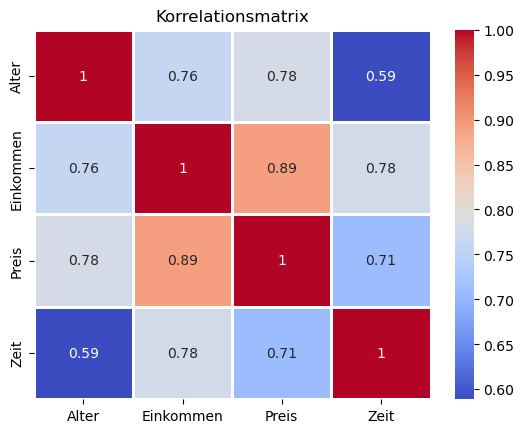

In [102]:
ausgewählte_spalten = ["Alter", "Einkommen", "Preis", "Zeit"]
korrelations_matrix = kunden_geo[ausgewählte_spalten].corr(method = 'pearson')

sns.heatmap(korrelations_matrix, annot = True, cmap = "coolwarm", linewidth = 1)
plt.title("Korrelationsmatrix")
plt.show()

<font size = "6">12. ist die Variable Zeit approximativ normalverteilt? (qq-Plot)>

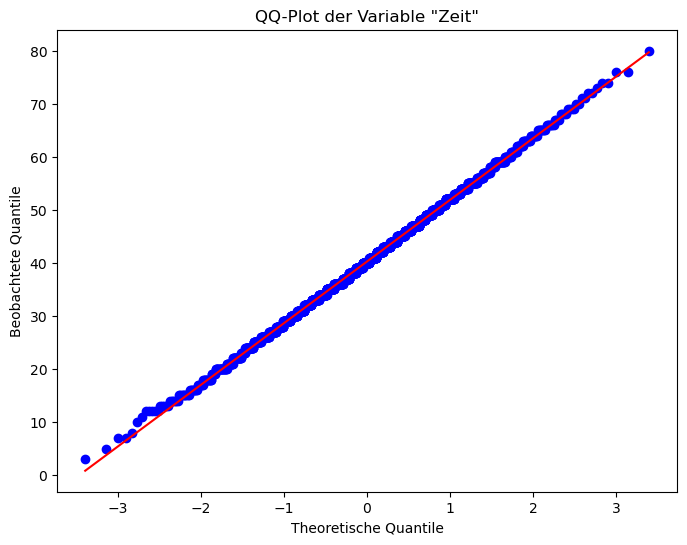

In [103]:
zeit = df_final["Zeit"]

# qq-Plot erstellen:
plt.figure(figsize = (8, 6))
stats.probplot(zeit, dist="norm", plot=plt)
plt.title('QQ-Plot der Variable "Zeit"')
plt.xlabel('Theoretische Quantile')
plt.ylabel('Beobachtete Quantile')
plt.show()
# da die Punkte entlang einer geraden Linie verlaufen kann davon ausgegangen werden, dass die Daten approvimativ normalverteilt sind

<font size = "6">13. Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen? Also wie viele Kunden haben ein Jahreseinkommen, das über dem Autopreis liegt?</font>

In [104]:
bedingung_einkommen_größer_preis = kunden_geo["Einkommen"] > kunden_geo["Preis"]
count_einkommen_größer_preis = bedingung_einkommen_größer_preis.sum()
count_einkommen_größer_preis
# 5 Kunden haben keinen Kredit aufnehmen müssen, um das Auto zu kaufen

5

<font size = "6">14. Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? Schätzen Sie eine Regression. </font>

In [105]:
# unabhängige Variablen: Alter, Einkommen, Geschlecht
# abhängige Variable: Preis

y_kunden = kunden_geo["Preis"]

X_kunden = kunden_geo[['Alter', 'Einkommen', 'Geschlecht']]

X_kunden = sm.add_constant(X_kunden)  # Konstante für den Intercept
                
model_kunden = sm.OLS(y_kunden, X_kunden).fit()
model_kunden.summary()
# Regression: Preis = 692.5659 +499.5016*Alter +1.0485*Einkommen + 2214.9438*Geschlecht
# alle drei Faktoren haben einen statistischen Einfluss auf den Preis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1692.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:26:33   Log-Likelihood:                -11770.
No. Observations:                1104   AIC:                         2.355e+04
Df Residuals:                    1100   BIC:                         2.357e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        692.5659   1416.702      0.489      0.625   -2087.177    3472.308
Alter        499.5016     40.136     12.445      0.000     420.750     578.253
Einkommen      1.0485      0.029     35.925      0.000       0.991       1.106
Geschlecht  2214.9438    648.591      3.415      0.001     942.328    3487.559
==============================================================================
Omnibus:                       40.847   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.427
Skew:                           0.244   Prob(JB):                     5.66e-18
Kurtosis:                       4.220   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size = "6"> 15. Prognose des Kaufpreises für 32-jährigen männlichen Kunden mit Einkommen von 30 000 Euro. Prognose des Kaufpreises für einen männlichen Kunden von 51 Jahren und Einkommen von 54 000 Euro.</font> 

In [106]:
X_predict_kunden = pd.DataFrame({
    'Alter': [32, 51],
    'Einkommen': [30000, 54000],
    'Geschlecht': [1,1]
})

X_predict_kunden = sm.add_constant(X_predict_kunden, has_constant='add')

prediction_kunden = model_kunden.predict(X_predict_kunden)

prediction_kunden
# Das Modell schätzt den Kaufpreis eines 32-jährigen männlichen Kundens mit Einkommen von 30 000 Euro auf 50345.86 Euro
# Das Modell schätzt den Kaufpreis eines 51-jährigen männlichen Kundens mit Einkommen von 54 000 Euro auf 84999.83 Euro



0    50345.858611
1    84999.827319
dtype: float64

<font size = "6"> 16. Welche Variable beeinflusst den Preis des Autos am
meisten? Vergleichbarkeit der Regressionskoeffizienten durch logistische Regression.</font>

In [107]:
# unabhängige Variablen: Alter, Einkommen, Geschlecht
# abhängige Variable: Preis

# Standardisierung
X_stand = kunden_geo[['Alter', 'Einkommen', 'Geschlecht', "Preis"]]
Standard = X_stand.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

# Regression
regression = 'Preis ~ Alter + Einkommen + Geschlecht' 
result = smf.ols(regression, data=Standard).fit()

# Betas 
round(result.params, 6)

# Den meisten Einfluss auf den Autopreis hat das Einkommen mit einem Beta von rund 0,7.


Intercept    -0.000000
Alter         0.244021
Einkommen     0.704733
Geschlecht    0.043492
dtype: float64

<font size = "6">17. Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt</font>

In [108]:
# spalte einfügen, ob Kunde = 1 oder Besucher = 0
kunden_geo['Kauf'] = 1
besucher_geo['Kauf'] = 0

# Besucher unter Kunden anfügen
daten_alle = pd.concat([kunden_geo, besucher_geo])

# Überprüfung ob Käufer = 1 und Besucher = 0
daten_alle

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung,Kauf
0,64,66894.0,88160.31,1,43.0,K0310,Bayern,1
1,54,77644.0,103145.70,1,40.0,K1042,Berlin,1
2,55,44341.0,80565.16,0,37.0,K0382,Baden-Württemberg,1
3,49,67271.0,83949.89,0,42.0,K0498,Bayern,1
4,46,49832.0,93781.58,0,41.0,K0552,Hessen,1
...,...,...,...,...,...,...,...,...
886,32,34392.0,NaN,1,48.0,K1211,Hessen,0
887,41,68516.0,NaN,0,34.0,K1375,Sachsen,0
888,65,89685.0,NaN,0,23.0,K1965,Bayern,0
889,68,95714.0,NaN,0,32.0,K1540,Bayern,0


In [109]:
# Regression
y_lg = daten_alle["Kauf"]

X_lg = daten_alle[['Alter', 'Einkommen', 'Geschlecht', 'Zeit']]

X_lg = sm.add_constant(X_lg)

model_lg = sm.Logit(y_lg, X_lg).fit()

print(model_lg.summary())

Optimization terminated successfully.
         Current function value: 0.578825
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Kauf   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                  0.1580
Time:                        18:26:33   Log-Likelihood:                -1154.8
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 1.715e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4360      0.264     -9.242      0.000      -2.953      -1.919
Alter          0.0183      0.

<font size = "6">18. Wie hoch ist die Wahrscheinlichkeit, dass Person x,y unser Auto kauft?</font>

In [110]:
# Kundendaten
Person_x = [1, 32, 30000, 1, 30]  # Kauf (1 = Kauf), Alter, Einkommen, Geschlecht (1 = männlich), Zeit 
Person_y = [1, 51, 54000, 1, 45] 

# Modell
params = model_lg.params

# Person X
log_1 = np.dot(params, Person_x)
wahrscheinlichkeit_person_x = 1 / (1 + np.exp(-log_1))

# Person Y 
log_2 = np.dot(params, Person_y)
wahrscheinlichkeit_person_y = 1 / (1 + np.exp(-log_2))

print(wahrscheinlichkeit_person_x)
print(wahrscheinlichkeit_person_y)

0.5465430448696972
0.7404466545605655


<font size = "6">19. Probleme bei der Zusammenführung des Datensatzes und Operationen zum Zusammenführen und Bereinigen der Daten</font>

In [ ]:
# 1.Umwandlung von Geschlecht in der Kunden-Datei von float in integer: kunden["Geschlecht"] = kunden["Geschlecht"].astype("int64")

# 2.Fehlende Daten in Kunden-Datei für Geschlecht:
# Herausgefunden mit der Operation kunden.isnull().sum(): zeigt die Werte mit "NaN", also wo keine Angaben sind
# Ermittlung des Modalwerts von Geschlecht: mit kunden["Geschlecht"].mode()
# Ersetzen der fehlenden Werte mit Modalwert: kunden.fillna(value = modalwert_kunden, axis = 0, inplace = True): setzt einen Wert für "NaN" ein, bei uns den Modalwert


# 3.Ausreißer in Kundendatei für Alter und Einkommen:
# Ausreißer beim Alter der Kunden identifizieren: kunden.loc[kunden['Ausreißer'] == True]: (2 Ausreißer: Personen im Alter von 100 und 120 Jahren werden kein Auto mehr kaufen)
# boxplot und describe-Tabelle zeigen die Ausreißer an: boxplot_alter = kunden.boxplot(column = 'Alter')
# kunden.describe().T
# Berechnung des Interquartilsabstandes: Q1, Q3 und IQR
# Q1_Alter = kunden['Alter'].quantile(0.25)
# Q3_Alter = kunden['Alter'].quantile(0.75)
# IQR_Alter = Q3_Alter - Q1_Alter

# Berechnung der Ausreißer-Grenzen:
# untere_grenze_Alter = Q1_Alter - 1.5 * IQR_Alter
# obere_grenze_Alter = Q3_Alter + 1.5 * IQR_Alter
# kunden['Ausreißer'] = (kunden['Alter'] < untere_grenze_Alter) | (kunden['Alter'] > obere_grenze_Alter)

# Ersetzen der Ausreißer in der Alters-Spalte durch Medianwert: alter_median = kunden['Alter'].median() und # kunden.replace([120, 100], alter_median, inplace=True)

# 4. Ausreißer-Werte beim Kunden-Einkommen identifiziert und mit dem Medianwert ersetzt (gleiches Prozedere wie bei Alter)

# 5. Bereinigung des Besucher-Datensatzes:
# Bereinigung der Kommaschreibweise und Umwandlung der dtypes von Einkommen, Zeit in Floats und Geschlecht in Integer
# Beispielhaft für Einkommen:
# besucher["Einkommen"] = besucher["Einkommen"].str.replace(",",".")
# besucher["Einkommen"] = pd.to_numeric(besucher["Einkommen"]) 
# besucher["Einkommen"] = besucher["Einkommen"].round(0).astype("float64")
# keine fehlenden Datenpunkte bei Besucher-Datei. Ausreißer entsprechen plausiblen Werten, daher wurden sie erhalten.

# 6.Umwandlung der geo-Datei von txt in csv: geo = pd.read_csv("geo.txt", sep = "\t")

# 7.Geo-Daten bereinigen: 
# Überprüfung aller einmaligen Werte: geo_niederlassung_uniques = geo["Niederlassung"].unique()

# Ersetzen der Werte, so dass jedes "Bundesland" nur einen Wert hat: 
# geo_cleaning = {
# "NRW" : "Nordrhein-Westfalen" ,
# "Berlin-Charlottenburg" : "Berlin" ,
# "Berlin-Mitte" : "Berlin" ,
# "BERLIN" : "Berlin",
# "Düsseldorf" : "Nordrhein-Westfalen"}

# geo["Niederlassung"] = geo["Niederlassung"].replace(geo_cleaning, regex = True)

# 8. Zusammenfügen der Kunden-Datei mit der Geo-Dateo: kunden_geo = pd.merge(kunden,geo, on = "KundeNr")
# Zusammefügen der Besucher-Datei mit der Geo-Datei 
# Zusammenfügen der Kunden-Geo und Besucher-Geo-Datei zu einer finalen Datei: df_final = pd.concat([kunden_geo, besucher_geo], axis = 0, ignore_index = True)
# CSV.Datei df_final exportieren: df_final.to_csv('df_final.csv', index=False)


<font size = "6">20. Vorschlaege für die Kundenabteilung</font>

- Einheitliche Daten: entweder Trennung durch Komma oder Punkt
- Vorgegebene Antwortmoeglichkeiten, um fehlende und fehlerhafte Angaben zu vermeiden
- Geo-Daten nach genauen Standorten zum Abgleich mit lokalem Einkommensniveau und lokalen Präferenzen (Stadt, Land)
- Weitere Informationen zu Kundenpräferenzen bezüglich Getriebe, Modell, Jahr, Kilometerstand (bei Gebrauchtwagen)
- Messung der Kundenzufriedenheit anhand einer Skala

In [113]:
<font size = "8">Vielen Dank für Ihre Aufmerksamkeit!</font>